<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/02_pytorch_rn_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 Redes Neurais de Classificacao com Pytorch

O porblema de classificacao preve se algo, eh uma coisa ou outra coisa(Pode haver varias coisas entre as opcoes). (Explicacao mais concisa que tu vai ver na vida)

## 1. Criando os dados para classificacao e preparar-los para usar

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn import datasets
import numpy as np


In [ ]:
# Fazendo 1000 circulos
n_samples = 1000

#CCriando os circulos
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"5 Primeiros elementos de X:\n {X[:5]}")
print(f"5 Primeiros elementos de y:\n {y[:5]}")

5 Primeiros elementos de X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
5 Primeiros elementos de y:
 [1 1 1 1 0]


In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Crinado um DF para os dados de circulos
circles = pd.DataFrame({"X1" : X[:, 0],
                       "X2" : X[:, 1],
                       "label": y})

circles.head(7)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1


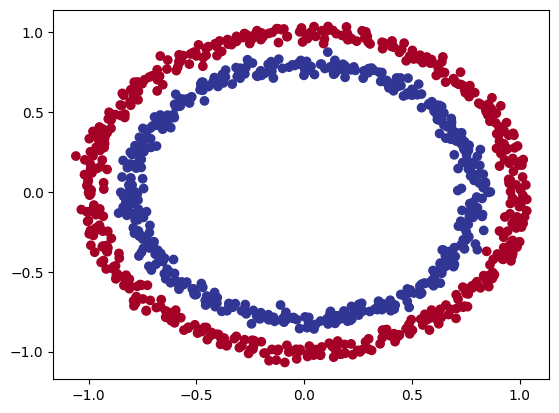

In [ ]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

#Nota: Os dados que estao sendo usados, sao referidos como "Toy dataset", que remete a dataset de brinquedo, devido ao fato de ele  ser pequeno o suficiente para experimentar e ainda ser de um tamanho razoavel para praticar os fundamentos

### Checando o formato dos dados de entrada e saida

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Vizualizando o primeiro valor das features e labels
X_sample = X[0]
y_sample = y[0]

print(f"Valor da 1 amostra de X: {X_sample} e valor da primeira amostra para y: {y_sample}")
print(f"Formato da 1 amostra de X: {X_sample.shape} e Formato da primeira amostra para y: {y_sample.shape}")

Valor da 1 amostra de X: [0.75424625 0.23148074] e valor da primeira amostra para y: 1
Formato da 1 amostra de X: (2,) e Formato da primeira amostra para y: ()


In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
#Transformando em Tensor
X = torch.from_numpy(X).type(torch.float) #.type(torch.float) pq apesar de tranformar em tensor com o ".from_numpy" eles estariam em tensor64, e queremos o default float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Ate 7:30
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test), n_samples

(800, 200, 800, 200, 1000)

## 2. Construir modelo

Modelo de classificacao para os pontos vermelhor e azuis.

Para isso:

1. Fazer um diagnostico de dispositivo para verificar se tem gpu habilitada
2.  Construir o modelo ussando a subclasse nn.Module
3. Define a loss function and a optimizer
4. Create a training and test loop

In [ ]:
# 1. Diagnostico de GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Para criar o modelo,

1. Subclasse nn.Module(quase todos os modulos Pytorch estao nela, nn.Module)
2. Criar 2 camads `nn.Linear()` capazes de lidar com o formato dos nossos dados
3. Definir um metodo `forward()` que passa os dados pelo modelo (computacao para frente)
4. Isntanciar uma instancia do modelo criado e mandar para o dispositivo desejado


In [ ]:
# 1. Construir um modelo que seja subclasse de nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Cirnado as duas camadas nn.linear capazes de lidar com o nosso formato de dados
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #Recebe 2 features e uperscale para 5 features, para a rede ter mais valores aonde acahr padrao
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # recebe as 5 que sairam da camada anterior e trasforma no aotput da rede

  # 3. Definindo o metodo forward() que passara os dados pra frente
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer-1 -> layer_2 -> output

# 4. Instanciando a instancia do modelo e mandando para o dspositivo "querido"
model_0 = CircleModelV0().to(device)

In [ ]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
#Replicando o modelo_0 usando nn.Sequentia()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#So usou de exemplo e escluiu, vou deixar p saber que da p usar a nn.Squencial dentro da classe
# e q nn.sequencial eh um jeito maissimples de fazer, quando passa de uma camada p outra
# 1. Construir um modelo que seja subclasse de nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Cirnado as duas camadas nn.linear capazes de lidar com o nosso formato de dados
    #self.layer_1 = nn.Linear(in_features=2, out_features=5) #Recebe 2 features e uperscale para 5 features, para a rede ter mais valores aonde acahr padrao
    #self.layer_2 = nn.Linear(in_features=5, out_features=1) # recebe as 5 que sairam da camada anterior e trasforma no aotput da rede
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  # 3. Definindo o metodo forward() que passara os dados pra frente
  def forward(self, x):
    #return self.layer_2(self.layer_1(x)) # x -> layer-1 -> layer_2 -> output
    return two_linear_layers
# 4. Instanciando a instancia do modelo e mandando para o dspositivo "querido"
model_0_ex = CircleModelV0().to(device)
model_0_ex

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3739,  0.4127],
                      [-0.3914,  0.6278],
                      [-0.3632, -0.0466],
                      [ 0.0402,  0.5092],
                      [ 0.5320, -0.4832]])),
             ('0.bias', tensor([ 0.6150, -0.6550, -0.2905, -0.4900,  0.1406])),
             ('1.weight',
              tensor([[ 0.0613,  0.2037,  0.2229, -0.1521, -0.0986]])),
             ('1.bias', tensor([0.0387]))])

In [ ]:
#Fazendo predicoes
with torch.inference_mode():
  semtreino = model_0(X_test.to(device))
print(f"Comprimento das predicoes: {len(semtreino)}, shape: {semtreino.shape}")
print(f"Comprimento da amostra de Teste: {len(X_test)}, shape: {X_test.shape}")
#print(f"\n10 Primeiras predicoes:\n{semtreino[:10]}")
print(f"\n10 Primeiras predicoes:\n{torch.round(semtreino[:10])}")

print(f"\n10 Lables:\n{y_test[:10]}")

Comprimento das predicoes: 200, shape: torch.Size([200, 1])
Comprimento da amostra de Teste: 200, shape: torch.Size([200, 2])

10 Primeiras predicoes:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.]])

10 Lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Cirando o funcao de loss e otimizador

QUal funcao loss e otimizador escolher? Depende do problema

Por ex: PAra Regressao, pode ser MAE ou MSE (mean absolute error ou mean squared error)

Para classificacao pode ser: Binary cross entropy ou categorical cross entropy(cros entropy)

Binary cross entropy - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

Relembrando que a funcao de loss, mede o quao errado a predicao do modelo esta.

Para otimizadores, alem de varias outras que o pytorch tem pre-prontas, as duas mais comum sao SGD e Adam


In [ ]:
# Criando a loss function
# loss_fn= nn.BCELoss = Requer que as entradas tenham passado pela função de ativação sigmoid antes de serem passadas para a BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function bult-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.1)

In [ ]:
# Calculando a precissao
#Precisao eh True Positive / (True Positive + True Negative) * 100

In [79]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # Converte o tensor com esse único valor em um escalar Python
  acc = (correct/len(y_pred)) * 100
  return acc

## 3 Train model

Para treinar o modelo, precisamos criar o loop de treino com os seguintes passos:

1. Forward passs
2. Calculate de loss
3. Optimizer zero grad
4. Loss backward (Backpropagation)
5. Optimizer step(gradinet descent)


### 3.1 Going from raw logist -> prediction probabilitis -> prediction lables

(Das saidas cruas(randomicas) -> para a as probabilidades de predcoes (onde o valor de porbabilidde ira indicar a probabilidade da saida ser determinada classe) -> Para Predicoes das classes(usando o valor gerado das probabilidades para determinar a classe)

As saidas do Model_0 sera as "raw logits"

Nos podemos converter os **logits** nas **probabilidades de predicoes**  passando eles por uma funcao de ativacao(ex Sigmoid para classificacao binaria e Softmax para classificacao multiclasse).

Entao podemos converter as probalibilidade de predicao do nosso modelo nas **labels preditas**, ou aredondando eles ou passando por `argmax()`.

In [ ]:
# Vendo as 5 primeiras saidas do forward pass nos dados de teste
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0898],
        [ 0.0444],
        [ 0.0414],
        [ 0.1042],
        [-0.2241]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Usando a funcao de ativaocao Sigmoid nos "logits" do modelo para tranfomalos em Probabilidade de Predicoes
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5224],
        [0.5111],
        [0.5103],
        [0.5260],
        [0.4442]])

Para nossos valores de Porbabilidade de Predicoes, precisamos performar uma especie de intervalo para arrendoar os numeros para classes.

EX
* y_pred_probs >= 0.5, y=1 (classe 1)
* y_pred_probs < 0.5, y=0 (classe 0)

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [ ]:
# Achando o Labels de predicao
y_preds = torch.round(y_pred_probs)

# Toda opercao, de novo, p comparar os resultyados
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Checando a igualdade das saidas
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Tirando a dimensao extra
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 0.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## Criando o loop de teste e treino

In [ ]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Definindo o numero de "epochs"
epochs = 1000

# Colocando os dados no dispositivo que esta sendo usado
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Contruindo o loop de treino e "eval"
for epoch in range(epochs):

  #treino
  model_0.train()

  # 1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoos espera probnabilidades de predicoes com entrada
  #                y_train)
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss espera as "saidas cru do modelo sem treinamento previo" como entrada
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #Jogando na tela os acontecimentos
  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69616, Acc: 49.50% | Test loss: 0.69609, Test acc: 46.00%
Epoch: 20 | Loss: 0.69461, Acc: 50.00% | Test loss: 0.69467, Test acc: 51.00%
Epoch: 40 | Loss: 0.69417, Acc: 49.25% | Test loss: 0.69426, Test acc: 55.50%
Epoch: 60 | Loss: 0.69390, Acc: 49.75% | Test loss: 0.69404, Test acc: 54.50%
Epoch: 80 | Loss: 0.69370, Acc: 49.62% | Test loss: 0.69391, Test acc: 54.50%
Epoch: 100 | Loss: 0.69355, Acc: 49.38% | Test loss: 0.69384, Test acc: 54.00%
Epoch: 120 | Loss: 0.69344, Acc: 49.75% | Test loss: 0.69380, Test acc: 54.00%
Epoch: 140 | Loss: 0.69335, Acc: 49.75% | Test loss: 0.69379, Test acc: 53.00%
Epoch: 160 | Loss: 0.69328, Acc: 50.62% | Test loss: 0.69380, Test acc: 53.00%
Epoch: 180 | Loss: 0.69322, Acc: 50.25% | Test loss: 0.69383, Test acc: 51.50%
Epoch: 200 | Loss: 0.69318, Acc: 50.88% | Test loss: 0.69386, Test acc: 49.50%
Epoch: 220 | Loss: 0.69314, Acc: 50.50% | Test loss: 0.69390, Test acc: 49.50%
Epoch: 240 | Loss: 0.69311, Acc: 50.88% | Test loss: 0.693

## 4. Fazendo predicoes e avaliacoes do modelo

Aparentemnte as metricas mostram que noss modelo nao esta avaliando bem

Para investigar nada melhor que algumas predicoes e faze-las visualmente

"Visualize, Visualize, Visualize"

para isso, importar a funcao: `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path
# Download helper functions from Learn Pytorch(repositorio do curso) (caos nao tenha baixado ainda no ambiente)
if Path("helper_functions.py").is_file():
  print("helper_function.py ja existe no ambiente, pulando download")
else:
  print("Baixando helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# nao funfou
#from helper_functions import plot_predictions, plot_decision_boundary

Baixando helper_functions.py


In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
#ja que enao funfou vou copir as duas funcoes.
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

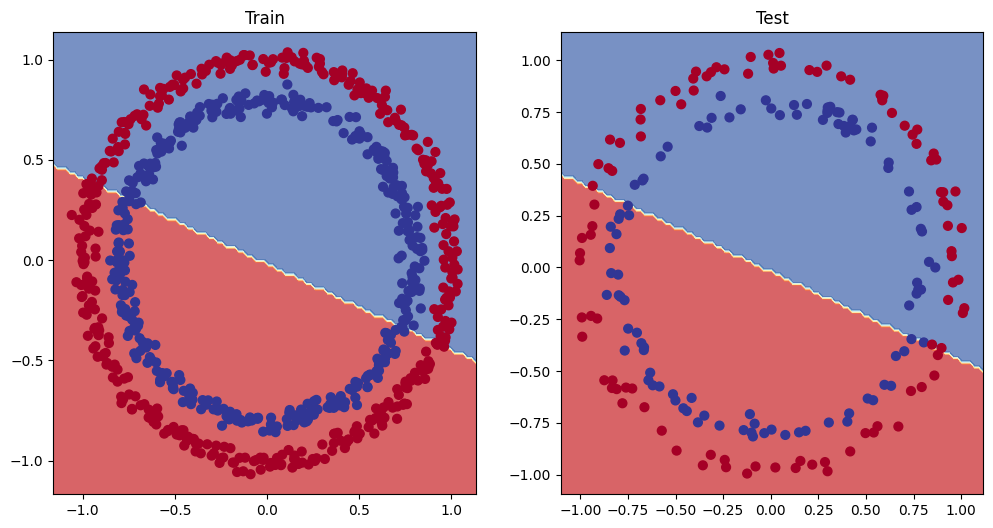

In [ ]:
#Plot decision boundary do modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## 5 Melhorando o modelo (pela perspectiva do modelo)

* Adicionar mais camada, dar mais chance para o modelo aprender sobre os padroes nos dados
* Adicionar mais unidades escondidas (out_features -> in_features) - "Ir de 5 para 10 unidades"
* Fir por mais tempo/epocas
* Mudando a funcao de ativacao
* Mudando o "Learning Rate"
* Mudando a loss function

EU -> pela perspectiva do modelo = coisa que se pode fazer para melhorar o mecanismo do modelo, mas nesse caso nao ira acontecer nada pois o modelo est errado para nosso tipo de problema.

Prof -> pela perspectiva do modelo = As opcoes acima da da perpectiva do modelo pois lidam diretamento com o modelo e nao com os dados.

 E por causa que essas opcoes sao valores que nos podemos muda(como engenheiro de Machine Learn e/ou como Cientista de dados) eles sao chamados de **Hyperparametros**

Lista da modificaoes:
* Add unidades escondidas: 5 -> 10
* Aumentando o numero de camadas: 2 -> 3
* Aumentando o numero de epocas 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # Escrever operações dessa maneira aproveita acelerações onde possível nos bastidores

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Crinado uma funcao loss
loss_fn = nn.BCEWithLogitsLoss()
# Criando um otimizador
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Loop de Treino e Teste
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Aumentando o treino 100 -> 1000
epochs = 1000

#DIrecionando os dados para o dispositiv usado
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #TReino
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logist -> pred Probabilities -> Predicion labes

  # 2. Calculo da Loos/Acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradinet descent)
  optimizer.step()

  ### TESTE
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculo do loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Na tela Dj
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | loss: 0.69396, Acc: 50.88% | Test loss: 0.6926146149635315, Test Acc: 51.00%
Epoch: 100 | loss: 0.69305, Acc: 50.38% | Test loss: 0.6937903761863708, Test Acc: 48.00%
Epoch: 200 | loss: 0.69299, Acc: 51.12% | Test loss: 0.6943727731704712, Test Acc: 46.00%
Epoch: 300 | loss: 0.69298, Acc: 51.62% | Test loss: 0.6945767998695374, Test Acc: 45.00%
Epoch: 400 | loss: 0.69298, Acc: 51.12% | Test loss: 0.6946452260017395, Test Acc: 46.00%
Epoch: 500 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946679949760437, Test Acc: 46.00%
Epoch: 600 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946756839752197, Test Acc: 46.00%
Epoch: 700 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946782469749451, Test Acc: 46.00%
Epoch: 800 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946792006492615, Test Acc: 46.00%
Epoch: 900 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946794390678406, Test Acc: 46.00%


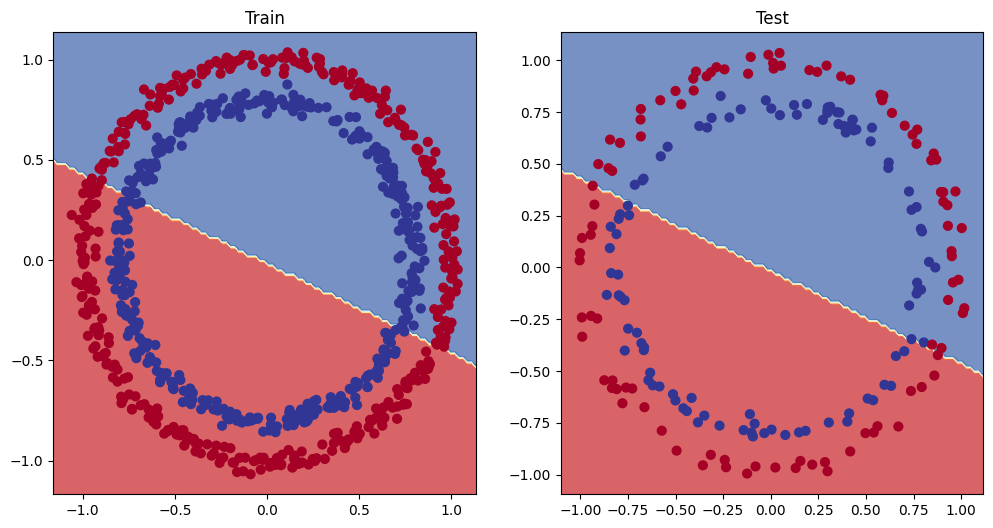

In [ ]:
#Plot decision boundary do modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparando dados para ver se o modelo aprende com linha reta

Uma maneira de resolver um problema grande eh testando um prblema menor e mais gerenciável que pode ajudar a isolar e identificar problemas de forma mais eficiente

In [ ]:
# Recriando os dados de linha reta do modulol1
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Criando os dados
X_reg = torch.arange(start, end, step).unsqueeze(dim=1)
y_reg = weight * X_reg + bias


print(len(X_reg))
X_reg[:5], y_reg[:5]



100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8 * len(X_reg))
X_train_reg, y_train_reg = X_reg[:train_split], y_reg[:train_split]
X_test_reg, y_test_reg = X_reg[train_split:], y_reg[train_split:]

# Tamanho
len(X_train_reg), len(y_test_reg)

(80, 20)

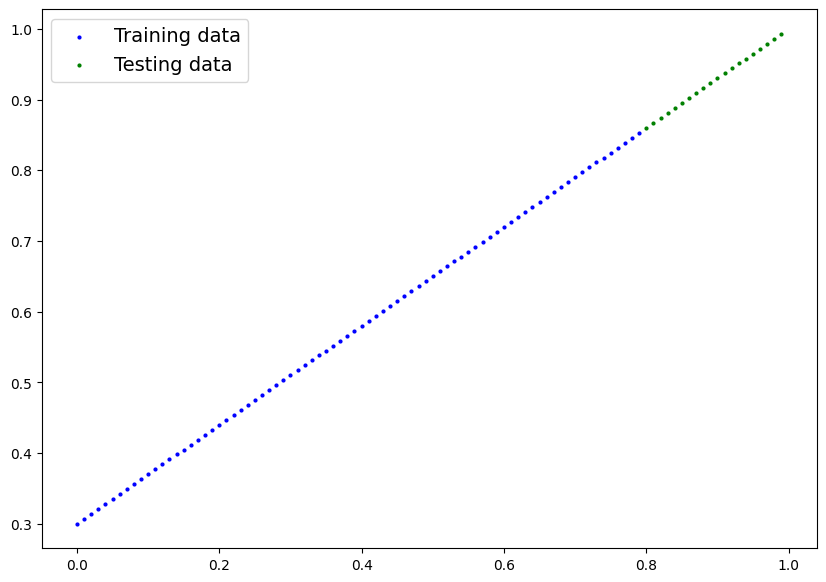

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Ajustando o model_1 para ser compativel com o formato do dados de uma linha reta

In [ ]:
#MEsma arquitetura do model_1 (mas usando nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Loss and Optimizer
loss_fn =nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)


In [ ]:
#Treino
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

#Colocando os dados no dispositivos usado
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_reg) # 1. forward pass
  loss = loss_fn(y_pred, y_train_reg) # 2. Loss
  optimizer.zero_grad() # 3. Zero grad
  loss.backward()
  optimizer.step()


  #Teste
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  #Na tela Dj
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


  # sobre eval no treino: Durante o treinamento: model.eval()
  #é usado dentro do loop de treinamento para garantir que a avaliação intermediária
  #(como a perda no conjunto de teste) seja feita no modo correto.

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


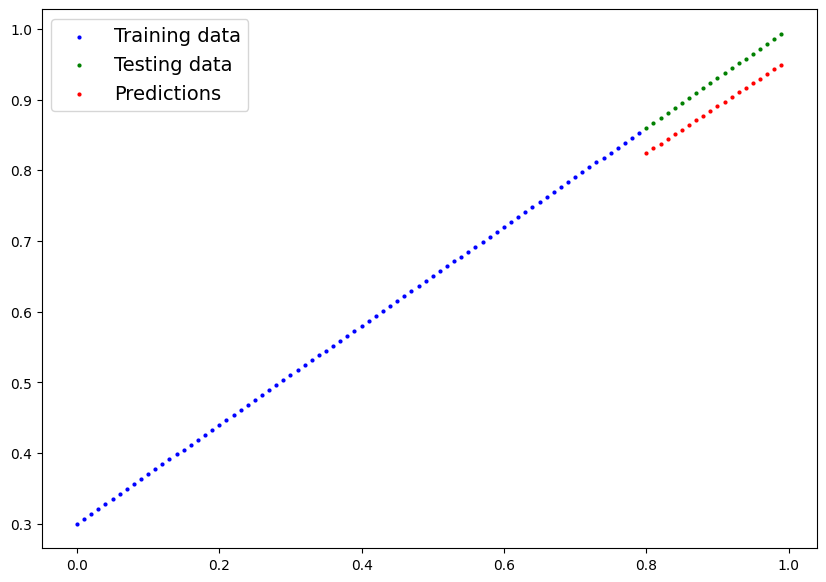

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=test_pred)


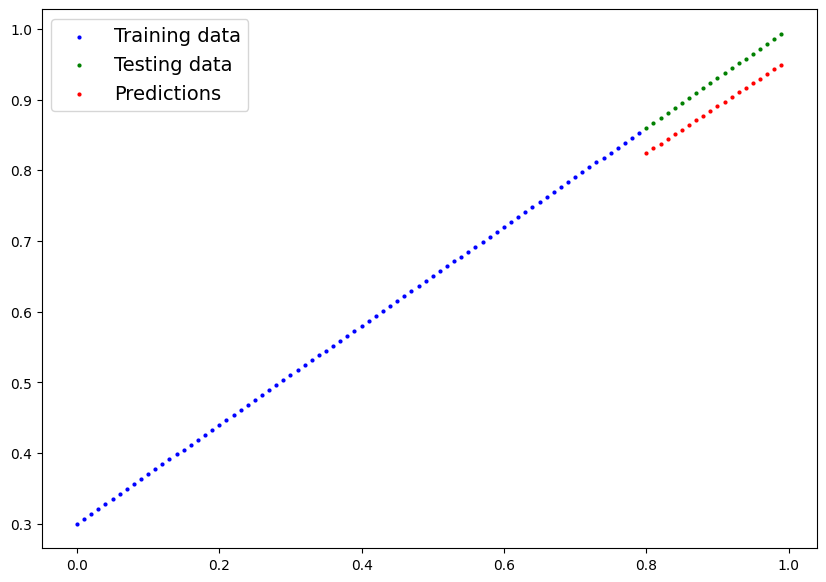

In [ ]:
# Acionar o "evaluation" mode | PQ? Se no for acima ja esta acionado?
#R:Após o treinamento: model.eval() é acionado novamente para garantir
#que o modelo esteja no modo de avaliação para gerar predições finais consistentes.
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(X_test_reg)

plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=y_preds)


## 6. Nao linearidade - Oq faltava para o modelo aprender o nosso problema

Quais padroes seriam possiveis de desenhar caso fossem dados uma infinidade de linhas retas e nao retas?

Em ML, uma infinita(mas finita kkkk) quantidade de funcoes linaeres e nao lineares.

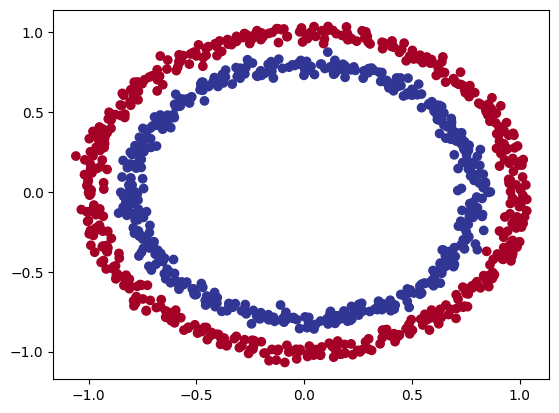

In [ ]:
# Fazendo e plotando os Dados | p nao precisar rodar os de cima
n_samples = 1000

#CCriando os circulos
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# COnverter os dados e dividos-los em treino e teste

# p tensor
#Transformando em Tensor
X = torch.from_numpy(X).type(torch.float) #.type(torch.float) pq apesar de tranformar em tensor com o ".from_numpy" eles estariam em tensor64, e queremos o default float32
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

### 6.2 COnstruindo um modelo com regras nao lineares

* Liner = Linha reta
* Nao linear = Nao linhas retas (ou seja, qualquer coisa que nao seja uma linha reta)

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #ReLU e uma funcao de ativacao nao linear

  def forward(self, x):
    # AONDE SAO COLOCADAS AS FUNCOES DE ATIVACOES NAO LINEARES
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# loss e otimizador
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Treinando o modelo com nao-linaeridade

In [ ]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

#Mandando para o dispositivo
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Qquantidade de treinamento
epochs = 1000

for epoch in range(epochs):
  ###Treinando
  model_3.train()

  # 1.Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred proba -> pred labels

  # 2. Calculate yhe loss
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss (recebe os logint como primeiro input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad (zerando o acumulado do gradiente para a procima epoch)
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Teste
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Na tela Dj
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}|% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Acc: 50.00|% | Test loss: 0.69319, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88|% | Test loss: 0.69102, Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37|% | Test loss: 0.68940, Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00|% | Test loss: 0.68723, Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75|% | Test loss: 0.68411, Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75|% | Test loss: 0.67941, Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50|% | Test loss: 0.67285, Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38|% | Test loss: 0.66322, Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00|% | Test loss: 0.64757, Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00|% | Test loss: 0.62145, Test Acc: 79.00%


In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.927

### Avaliacao do modelo treinado com funcoes nao lineares de ativacao

In [ ]:
#Predicoes
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:15], y_test[:15]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.]))

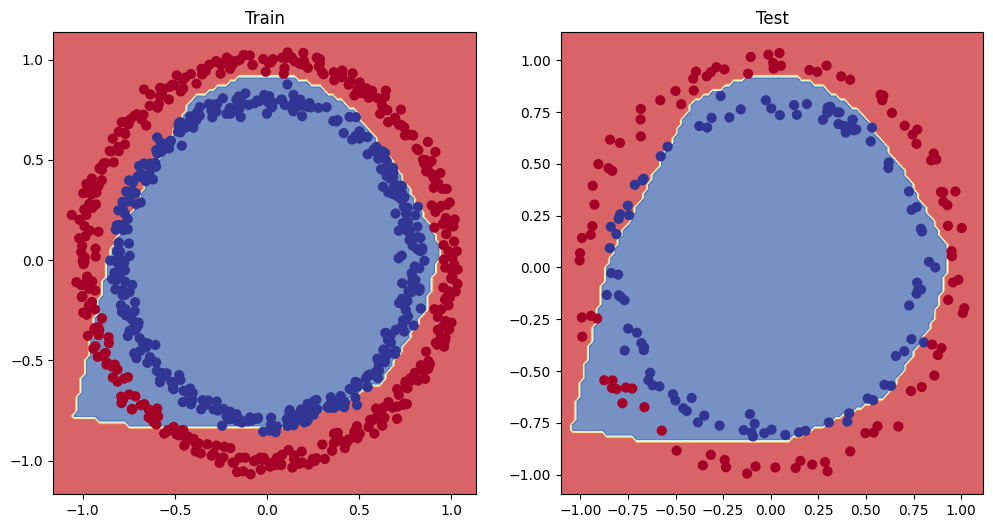

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

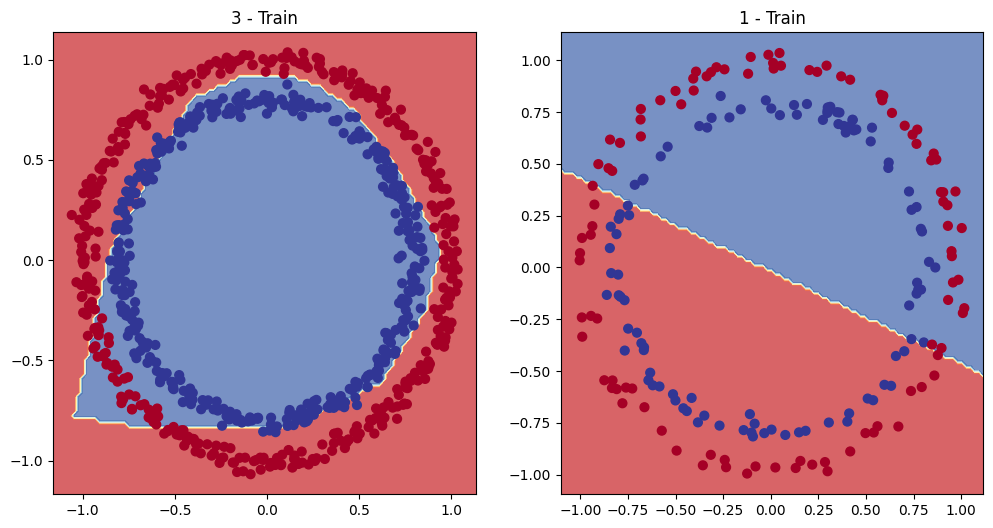

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("3 - Train")
plot_decision_boundary(model_3, X_train, y_train)  # Com func nao linear
plt.subplot(1, 2, 2)
plt.title("1 - Train")
plot_decision_boundary(model_1, X_test, y_test) # apenas func linear

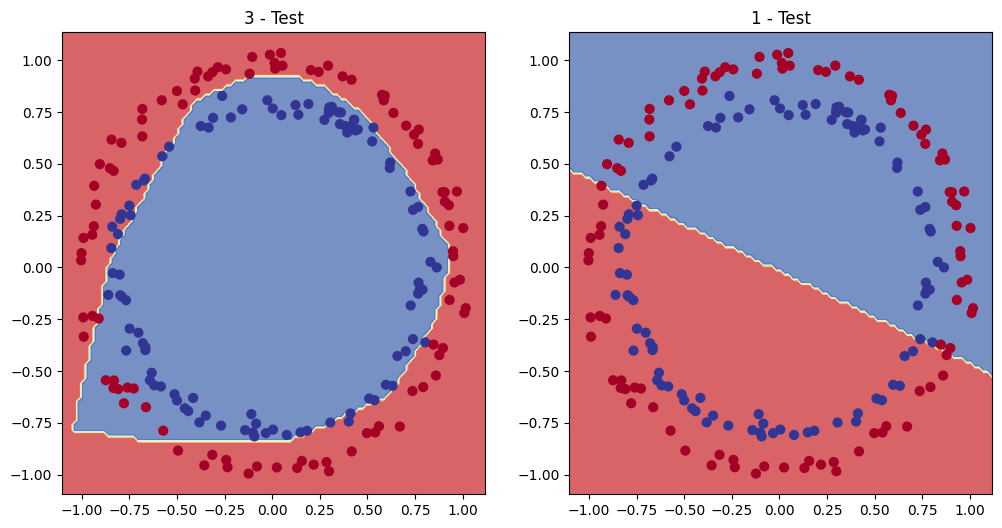

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("3 - Test")
plot_decision_boundary(model_3, X_test, y_test) #Com func nao linear
plt.subplot(1, 2, 2)
plt.title("1 - Test")
plot_decision_boundary(model_1, X_test, y_test) # apenas func linear

## 7. Replicando as funcoes de ativacao nao-lineares

```
# Isto está formatado como código
```



Redes Neurais, ao invez de dzermos para as redes o que parender, nos dados as ferramentas para ela, e ela tenta aprender os padroes dos dados por conta propria.

As ferramentas acima citas sao, funcoes lineares e nao-lineares

In [ ]:
#Criando um tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype, A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

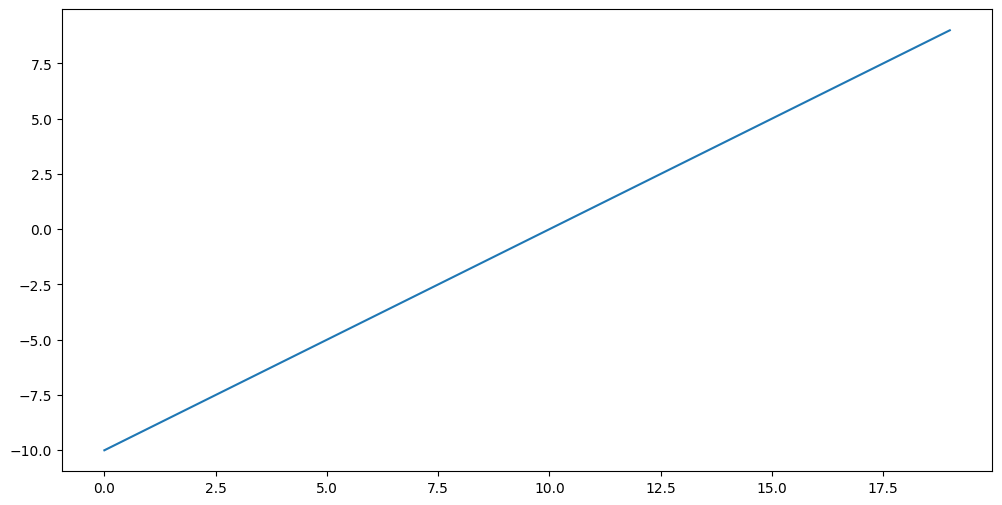

In [ ]:
#Vizualizando o tensor
plt.figure(figsize=(12, 6))
plt.plot(A);

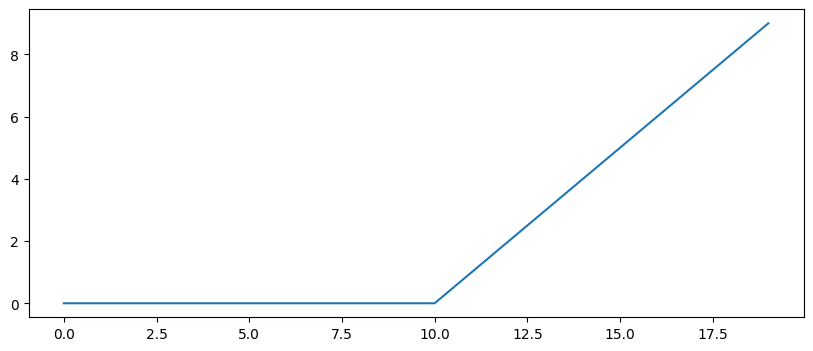

In [ ]:
#Vizualizando otensor passado pela funcao nao linear ReLU
plt.figure(figsize=(10, 4))
plt.plot(torch.relu(A));

### Criando o funcao ReLU

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # A entrada deve ser Tensor

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

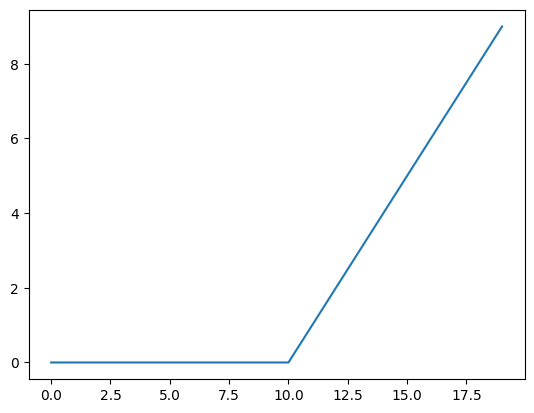

In [ ]:
plt.plot(relu(A))

### Criando a funcao Sigmoid

In [ ]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1  + torch.exp(-x))

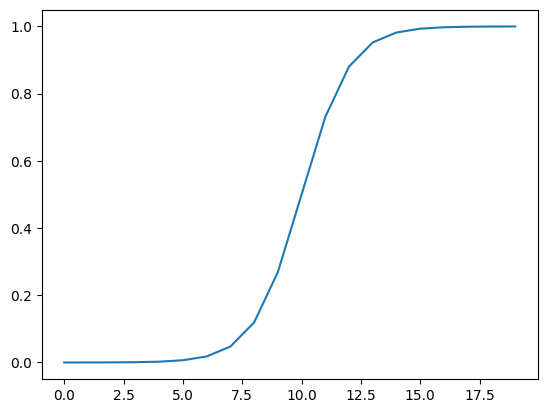

In [ ]:
plt.plot(torch.sigmoid(A))

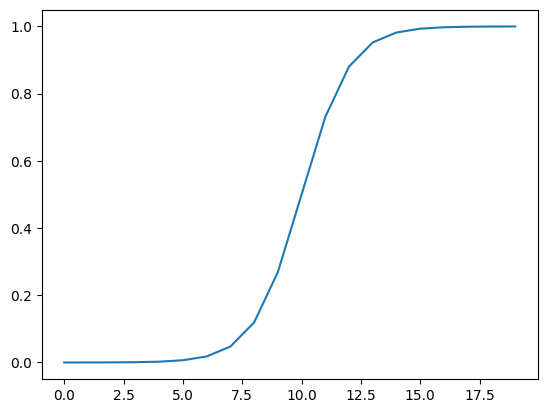

In [ ]:
plt.plot(sigmoid(A))

## 8 Colocando tudo junto com um problema de classificao multi classe

* Classificacao Binaria = Um ou outro(spam / nao-spam)
* Classificacao Multi Classe = mais que um ou outro | A ou B ou C (gato X cachorro X pato)

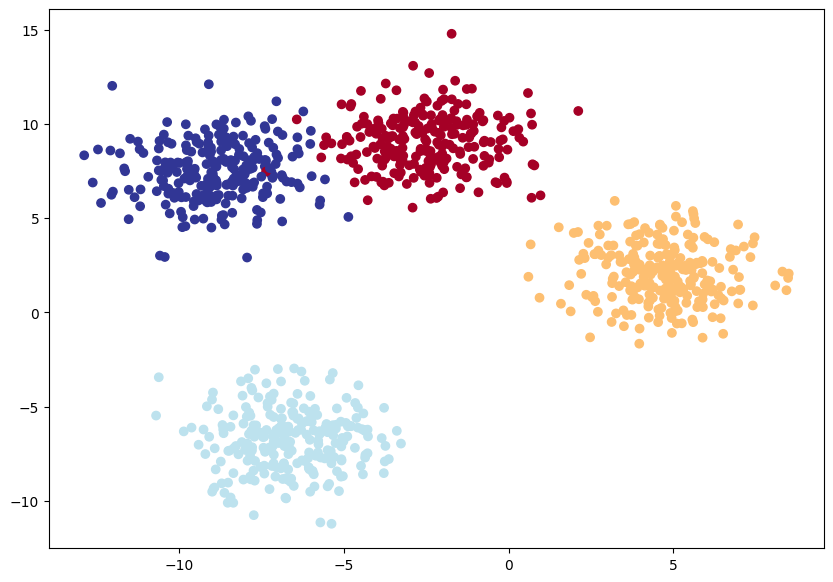

In [59]:
#Importando dependecias (vou importar os novos e velhos p nao precisar rodar do inicio ate o fim do modulo)
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

#Setando os hyperparametros para criacao do dataset
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Criando os dados multiclasse
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, #
                            random_state=RANDOM_SEED)

# 2. Dados pra Tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Dividindo em treino e Teste
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data()
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


### 8.2 Construindo um modelo de classificacao multi classe

In [60]:
# Diagnostico de dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [61]:
from torch import nn

In [62]:
#Criando o modelo
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Inicializando o modelo de classificacao multi-classe

    Arg:
      input_features(int): Numero de entrada do modelo
      output_features(int): Numero de saidas do modelo(numero de classes neste caso)
      hidden_units(int): Numero de unidades escondidas entre as camadas, default 8
    """
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features),
  )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Criando a instancia do BlobModel e mandando para o dispositivo usado

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8
                    ).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [63]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [64]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [65]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Criando a loss function e otimizador para o modelo de classificacao multi-classe

In [66]:
# Criando a loss_fn
loss_fn = nn.CrossEntropyLoss()

# Criando o otimizador
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) #Learing rate e um hyperparametro que pode se mudar

### 8.4 Prevendo probabilidades para o modelo multi-classe
Com a finalidade de avaliar, treinar e testar o modelo, devemos converter as saidas do modelo(logits) para probabilidade de predicoes a depois para predicao de labels.

Logits (Saidas cruas do modelo) -> Pred Prob (`use torch.softmax`) -> Pred Labels (pega o maior 'argmax' das probabilidades(ou seja selecionar  indice de maior probabilidade entre as probabilidades previstas de cada amostra))

In [67]:
#Experimentacoes
#model_4(X_blob_test)
teste = torch.round(torch.sigmoid(X_blob_test))
teste[:10]

tensor([[1., 1.],
        [0., 1.],
        [0., 0.],
        [1., 1.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 1.]])

In [68]:
#Experimentacoes
def count_similar_pairs(tensor):
    # Converte o tensor para uma lista de tuplas para facilitar a contagem
    pairs = [tuple(pair.tolist()) for pair in tensor]

    # Usa um dicionário para contar as ocorrências de cada par
    pair_counts = {}
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

    return pair_counts

count_similar_pairs(teste)

{(1.0, 1.0): 39, (0.0, 1.0): 105, (0.0, 0.0): 53, (1.0, 0.0): 3}

In [69]:
# Vamos pegar os logits
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [70]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [71]:
# Convertendo os logits do modelo em prababilidades de predicoes
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [72]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [73]:
torch.max(y_pred_probs[0]), torch.max(y_pred_probs[1]), torch.max(y_pred_probs[2]), torch.max(y_pred_probs[3])

(tensor(0.3244), tensor(0.3336), tensor(0.3011), tensor(0.3078))

In [74]:
torch.argmax(y_pred_probs[0]), torch.argmax(y_pred_probs[1]), torch.argmax(y_pred_probs[2]), torch.argmax(y_pred_probs[3]), torch.argmax(y_pred_probs[8]), torch.argmax(y_pred_probs[60])

(tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0))

In [75]:
#TEste
torch.argmax(y_logits[60]) #Argmax do y_logits ja retorna a classe de maior probabilidade, se, o uso da softmax

tensor(0)

In [76]:
#COnvertendo os probabilidades de predicoes em predicoes de labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [77]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Criando o loop de treinoi e teste para o modelo Multi-Classes

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # Converte o tensor com esse único valor em um escalar Python
  acc = (correct/len(y_pred)) * 100
  return acc

In [84]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

#Dados no dispositivo
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#Passando os ados
for epoch in range(epochs):
  ###treino
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ###Teste
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}% ")



Epoch: 0 | Loss: 0.9801, Acc: 61.38% | Test loss: 0.9413, Test Acc: 64.00% 
Epoch: 10 | Loss: 0.5979, Acc: 97.75% | Test loss: 0.6128, Test Acc: 98.00% 
Epoch: 20 | Loss: 0.3876, Acc: 98.88% | Test loss: 0.3907, Test Acc: 100.00% 
Epoch: 30 | Loss: 0.2194, Acc: 99.25% | Test loss: 0.2088, Test Acc: 99.50% 
Epoch: 40 | Loss: 0.0976, Acc: 99.25% | Test loss: 0.0884, Test Acc: 99.50% 
Epoch: 50 | Loss: 0.0620, Acc: 99.25% | Test loss: 0.0543, Test Acc: 99.50% 
Epoch: 60 | Loss: 0.0487, Acc: 99.25% | Test loss: 0.0410, Test Acc: 99.50% 
Epoch: 70 | Loss: 0.0419, Acc: 99.25% | Test loss: 0.0337, Test Acc: 99.50% 
Epoch: 80 | Loss: 0.0376, Acc: 99.25% | Test loss: 0.0291, Test Acc: 99.50% 
Epoch: 90 | Loss: 0.0348, Acc: 99.25% | Test loss: 0.0261, Test Acc: 99.50% 


In [81]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [82]:
y_pred

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Experimentacoes

In [ ]:
class CircleModelV2e1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=100)
    self.layer_2 = nn.Linear(in_features=100, out_features=100)
    self.layer_3 = nn.Linear(in_features=100, out_features=1)
    self.relu = nn.ReLU() #ReLU e uma funcao de ativacao nao linear

  def forward(self, x):
    # AONDE SAO COLOCADAS AS FUNCOES DE ATIVACOES NAO LINEARES
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3e1 = CircleModelV2e1().to(device)
model_3e1

In [ ]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

#Mandando para o dispositivo
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Qquantidade de treinamento
epochs = 1000

for epoch in range(epochs):
  ###Treinando
  model_3e1.train()

  # 1.Forward pass
  y_logits = model_3e1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred proba -> pred labels

  # 2. Calculate yhe loss
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss (recebe os logint como primeiro input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad (zerando o acumulado do gradiente para a procima epoch)
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Teste
  model_3e1.eval()
  with torch.inference_mode():
    test_logits = model_3e1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Na tela Dj
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}|% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3e1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3e1, X_test, y_test)

In [ ]:
class CircleModelV2e2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #ReLU e uma funcao de ativacao nao linear

  def forward(self, x):
    # AONDE SAO COLOCADAS AS FUNCOES DE ATIVACOES NAO LINEARES
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3e2 = CircleModelV2e2().to(device)
model_3e2

In [ ]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

#Mandando para o dispositivo
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Qquantidade de treinamento
epochs = 1000

for epoch in range(epochs):
  ###Treinando
  model_3e2.train()

  # 1.Forward pass
  y_logits = model_3e2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred proba -> pred labels

  # 2. Calculate yhe loss
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss (recebe os logint como primeiro input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad (zerando o acumulado do gradiente para a procima epoch)
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Teste
  model_3e2.eval()
  with torch.inference_mode():
    test_logits = model_3e2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Na tela Dj
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}|% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3e2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3e2, X_test, y_test)

In [ ]:
torch.round(torch.softmax(X_blob_test))